# 📚 head_att 기능 완전 가이드

## 📖 목차
1. [기본 설정](#1-기본-설정)
2. [기본 사용법](#2-기본-사용법)
3. [out 옵션 테스트](#3-out-옵션-테스트)
4. [다양한 데이터 타입 테스트](#4-다양한-데이터-타입-테스트)
5. [에러 처리 및 경계 조건](#5-에러-처리-및-경계-조건)
6. [실제 사용 예제](#6-실제-사용-예제)

In [8]:
# 테스트를 위하여 무조건 모듈 로드

import importlib.util, sys

# # helper 모듈 다운로드 (이미 있으면 덮어쓰기)
# urllib.request.urlretrieve("https://raw.githubusercontent.com/c0z0c/jupyter_hangul/master/helper.c0z0c.dev.py", "helper.c0z0c.dev.py")

# helper 모듈 다시 로드
spec = importlib.util.spec_from_file_location("helper", "helper.c0z0c.dev.py")
helper = importlib.util.module_from_spec(spec)
sys.modules["helper"] = helper
spec.loader.exec_module(helper)
print("📁 helper 모듈을 로드했습니다.")

# setup 실행
helper.setup()

📁 helper 모듈을 로드했습니다.
🚀 Jupyter/Colab 한글 환경 설정을 시작합니다...
✔️ Font already exists.
font_path=fonts\NanumGothic.ttf


**💻 실행 환경**: 로컬
✅ 한글 폰트가 성공적으로 설정되었습니다.

✅ pandas 확장 기능이 성공적으로 설정되었습니다.
🎉 모든 설정이 완료되었습니다!
✅ 사용 가능한 기능:
   - 한글 폰트 지원
   - helper.pd_read_csv(): 파일 읽기
   - DataFrame.head_att(): 한글 컬럼 설명


## 1. 기본 설정

In [9]:
# 라이브러리 import 및 helper 로드
import pandas as pd
import numpy as np
from datetime import datetime, date

# helper 모듈 로드
exec(open('helper.c0z0c.dev.py').read())

print("✅ 라이브러리 및 helper 모듈 로드 완료!")

✅ 라이브러리 및 helper 모듈 로드 완료!


In [10]:
# 테스트용 데이터프레임 생성
sample_df = pd.DataFrame({
    'student_id': [1001, 1002, 1003, 1004, 1005],
    'name': ['김철수', '이영희', '박민수', '최지영', '정동호'],
    'age': [20, 21, 22, 19, 23],
    'score': [85.5, 92.3, 78.1, 88.7, 94.2],
    'grade': ['B+', 'A', 'C+', 'B+', 'A'],
    'passed': [True, True, False, True, True],
    'enrollment_date': pd.to_datetime(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05']),
    'department': ['컴퓨터공학', '경영학', '물리학', '화학과', '수학과'],
    'gpa': [3.5, 4.0, 2.8, 3.8, 4.2],
    'credits': [18, 21, 15, 20, 24]
})

# 한글 설명 설정
sample_df.set_head_att({
    'student_id': '학생 고유 번호',
    'name': '학생 이름',
    'age': '만 나이',
    'score': '중간고사 점수 (100점 만점)',
    'grade': '학점 등급 (A, B+, B, C+ 등)',
    'passed': '합격 여부 (True: 합격, False: 불합격)',
    'enrollment_date': '입학 날짜',
    'department': '소속 학과',
    'gpa': '평점 (4.5 만점)',
    'credits': '이수 학점 수'
})

print("✅ 테스트 데이터프레임 생성 완료!")
print(f"📊 데이터 크기: {sample_df.shape}")

✅ 테스트 데이터프레임 생성 완료!
📊 데이터 크기: (5, 10)


## 2. 기본 사용법

In [11]:
print("🔍 2-1. 기본 head_att() 사용")
print("=" * 40)
sample_df.head_att(3)

🔍 2-1. 기본 head_att() 사용
   학생 고유 번호 학생 이름 만 나이 중간고사 점수 (100점 만점) 학점 등급 (A, B+, B, C+ 등) 합격 여부 (True: 합격, False: 불합격)           입학 날짜  소속 학과 평점 (4.5 만점) 이수 학점 수
       student_id      name     age                      score                       grade                                passed     enrollment_date department             gpa      credits
 0           1001    김철수      20                       85.5                          B+                                  True 2024-01-01 00:00:00 컴퓨터공학             3.5           18
 1           1002    이영희      21                       92.3                           A                                  True 2024-01-02 00:00:00     경영학             4.0           21
 2           1003    박민수      22                       78.1                          C+                                 False 2024-01-03 00:00:00     물리학             2.8           15


In [12]:
print("🔍 2-2. 컬럼 구조만 보기 (head_att(0))")
print("=" * 40)
sample_df.head_att(0)

🔍 2-2. 컬럼 구조만 보기 (head_att(0))
   학생 고유 번호 학생 이름 만 나이 중간고사 점수 (100점 만점) 학점 등급 (A, B+, B, C+ 등) 합격 여부 (True: 합격, False: 불합격)       입학 날짜  소속 학과 평점 (4.5 만점) 이수 학점 수
       student_id      name     age                      score                       grade                                passed enrollment_date department             gpa      credits


In [13]:
print("🔍 2-3. 설명 확인 및 수정")
print("=" * 40)

# 현재 설명 확인 (전체 딕셔너리)
print("▶️ 현재 설정된 설명 (전체):")
descriptions = sample_df.get_head_att()
for col, desc in descriptions.items():
    print(f"  {col}: {desc}")

# 개별 컬럼 설명 확인 (새로운 기능)
print("\n▶️ 개별 컬럼 설명 확인:")
print(f"  score: {sample_df.get_head_att('score')}")
print(f"  name: {sample_df.get_head_att('name')}")

# 개별 설명 수정
print("\n▶️ 'score' 컬럼 설명 수정:")
sample_df.set_head_att('score', '기말고사 점수 (100점 만점)')
print(f"  수정 후 score: {sample_df.get_head_att('score')}")

# 설명 제거
print("\n▶️ 'credits' 컬럼 설명 제거:")
sample_df.remove_head_att('credits')
print(f"  credits 설명 존재 여부: {'credits' in sample_df.get_head_att()}")

# 존재하지 않는 컬럼 에러 처리 테스트
print("\n▶️ 존재하지 않는 컬럼 요청 테스트:")
try:
    sample_df.get_head_att('non_existing_column')
except KeyError as e:
    print(f"  ✅ 예상된 KeyError 발생: {e}")
except Exception as e:
    print(f"  ❌ 예상치 못한 에러: {e}")

# 잘못된 타입 에러 처리 테스트
print("\n▶️ 잘못된 타입 매개변수 테스트:")
try:
    sample_df.get_head_att(123)
except TypeError as e:
    print(f"  ✅ 예상된 TypeError 발생: {e}")
except Exception as e:
    print(f"  ❌ 예상치 못한 에러: {e}")

🔍 2-3. 설명 확인 및 수정
▶️ 현재 설정된 설명 (전체):
  student_id: 학생 고유 번호
  name: 학생 이름
  age: 만 나이
  score: 중간고사 점수 (100점 만점)
  grade: 학점 등급 (A, B+, B, C+ 등)
  passed: 합격 여부 (True: 합격, False: 불합격)
  enrollment_date: 입학 날짜
  department: 소속 학과
  gpa: 평점 (4.5 만점)
  credits: 이수 학점 수

▶️ 개별 컬럼 설명 확인:
  score: 중간고사 점수 (100점 만점)
  name: 학생 이름

▶️ 'score' 컬럼 설명 수정:
  수정 후 score: 기말고사 점수 (100점 만점)

▶️ 'credits' 컬럼 설명 제거:
  credits 설명 존재 여부: False

▶️ 존재하지 않는 컬럼 요청 테스트:
  ✅ 예상된 KeyError 발생: "컬럼 'non_existing_column'에 대한 설명이 없습니다. 사용 가능한 컬럼: ['student_id', 'name', 'age', 'score', 'grade', 'passed', 'enrollment_date', 'department', 'gpa']"

▶️ 잘못된 타입 매개변수 테스트:
  ✅ 예상된 TypeError 발생: key는 문자열이어야 합니다. 현재 타입: <class 'int'>


## 3. out 옵션 테스트

In [14]:
print("🔍 3-1. out='print' (기본값)")
print("=" * 40)
print("▶️ 콘솔에 직접 출력:")
sample_df.head_att(2, out='print')

🔍 3-1. out='print' (기본값)
▶️ 콘솔에 직접 출력:
   학생 고유 번호 학생 이름 만 나이 기말고사 점수 (100점 만점) 학점 등급 (A, B+, B, C+ 등) 합격 여부 (True: 합격, False: 불합격)           입학 날짜  소속 학과 평점 (4.5 만점) credits
       student_id      name     age                      score                       grade                                passed     enrollment_date department             gpa credits
 0           1001    김철수      20                       85.5                          B+                                  True 2024-01-01 00:00:00 컴퓨터공학             3.5      18
 1           1002    이영희      21                       92.3                           A                                  True 2024-01-02 00:00:00     경영학             4.0      21


In [15]:
print("🔍 3-2. out='str' 또는 out='string'")
print("=" * 40)

# 문자열로 반환
str_result = sample_df.head_att(2, out='str')
print(f"▶️ 반환된 타입: {type(str_result)}")
print(f"▶️ 문자열 길이: {len(str_result)}자")
print("▶️ 문자열 내용:")
print(str_result)

# 'string'과 'str'은 동일한 결과
string_result = sample_df.head_att(2, out='string')
print(f"\n▶️ 'str'과 'string' 결과 동일 여부: {str_result == string_result}")

🔍 3-2. out='str' 또는 out='string'
▶️ 반환된 타입: <class 'str'>
▶️ 문자열 길이: 684자
▶️ 문자열 내용:
학생 고유 번호학생 이름      만 나이   기말고사 점수 (100점 만점)학점 등급 (A, B+, B, C+ 등)합격 여부 (True: 합격, False: 불합격)입학 날짜                             소속 학과           평점 (4.5 만점)credits         
student_idname           age       score   grade                      passed                      enrollment_date                       department          gpa        credits         
01001김철수         20        85.5    B+                         True                        2024-01-01 00:00:00                   컴퓨터공학          3.5        18              
11002이영희         21        92.3    A                          True                        2024-01-02 00:00:00                   경영학              4.0        21

▶️ 'str'과 'string' 결과 동일 여부: True


In [16]:
print("🔍 3-3. out='html'")
print("=" * 40)

# HTML 객체로 반환
html_result = sample_df.head_att(2, out='html')
print(f"▶️ 반환된 타입: {type(html_result)}")

# HTML 내용 확인
html_content = html_result.data if hasattr(html_result, 'data') else str(html_result)
print(f"▶️ HTML 내용 길이: {len(html_content)}자")

print("\n▶️ HTML 렌더링 결과:")
html_result  # 자동 렌더링

🔍 3-3. out='html'
▶️ 반환된 타입: <class 'IPython.core.display.HTML'>
▶️ HTML 내용 길이: 985자

▶️ HTML 렌더링 결과:


,학생 고유 번호student_id,학생 이름name,만 나이age,기말고사 점수 (100점 만점)score,"학점 등급 (A, B+, B, C+ 등)grade","합격 여부 (True: 합격, False: 불합격)passed",입학 날짜enrollment_date,소속 학과department,평점 (4.5 만점)gpa,credits
0,1001,김철수,20,85.5,B+,True,2024-01-01,컴퓨터공학,3.5,18
1,1002,이영희,21,92.3,A,True,2024-01-02,경영학,4.0,21


In [17]:
print("🔍 3-4. 잘못된 out 옵션 에러 처리")
print("=" * 40)

invalid_options = ['json', 'xml', 'csv', 'excel']
for opt in invalid_options:
    try:
        sample_df.head_att(1, out=opt)
        print(f"❌ '{opt}' 옵션이 에러를 발생시키지 않음")
    except ValueError as e:
        print(f"✅ '{opt}' 옵션 - 예상된 에러 발생: {e}")
    except Exception as e:
        print(f"⚠️ '{opt}' 옵션 - 예상치 못한 에러: {e}")

🔍 3-4. 잘못된 out 옵션 에러 처리
✅ 'json' 옵션 - 예상된 에러 발생: out 옵션은 'html', 'print', 'str', 'string' 중 하나여야 합니다.
✅ 'xml' 옵션 - 예상된 에러 발생: out 옵션은 'html', 'print', 'str', 'string' 중 하나여야 합니다.
✅ 'csv' 옵션 - 예상된 에러 발생: out 옵션은 'html', 'print', 'str', 'string' 중 하나여야 합니다.
✅ 'excel' 옵션 - 예상된 에러 발생: out 옵션은 'html', 'print', 'str', 'string' 중 하나여야 합니다.


## 4. 다양한 데이터 타입 테스트

In [18]:
print("🔍 4-1. 빈 데이터프레임")
print("=" * 40)

# 완전히 빈 데이터프레임
empty_df = pd.DataFrame()
print("▶️ 빈 DataFrame:")
empty_df.head_att()

# 컬럼만 있는 빈 데이터프레임
empty_with_cols = pd.DataFrame(columns=['A', 'B', 'C'])
empty_with_cols.set_head_att({'A': '첫번째 컬럼', 'B': '두번째 컬럼', 'C': '세번째 컬럼'})
print("\n▶️ 컬럼만 있는 빈 DataFrame:")
empty_with_cols.head_att()

🔍 4-1. 빈 데이터프레임
▶️ 빈 DataFrame:
  
  

▶️ 컬럼만 있는 빈 DataFrame:
   첫번째 컬럼 두번째 컬럼 세번째 컬럼
             A           B           C


In [19]:
print("🔍 4-2. 다양한 데이터 타입")
print("=" * 40)

# 다양한 데이터 타입을 포함한 데이터프레임
mixed_df = pd.DataFrame({
    'integers': [1, 2, 3, 4, 5],
    'floats': [1.1, 2.2, 3.3, 4.4, 5.5],
    'strings': ['가', '나', '다', '라', '마'],
    'booleans': [True, False, True, False, True],
    'dates': pd.date_range('2024-01-01', periods=5),
    'categories': pd.Categorical(['A', 'B', 'A', 'C', 'B']),
    'nullable_ints': pd.array([1, 2, None, 4, 5], dtype='Int64'),
    'objects': [{'a': 1}, [1, 2], 'text', 123, None]
})

mixed_df.set_head_att({
    'integers': '정수형 데이터',
    'floats': '실수형 데이터',
    'strings': '문자열 데이터',
    'booleans': '불린 데이터',
    'dates': '날짜 데이터',
    'categories': '카테고리 데이터',
    'nullable_ints': 'Null 가능한 정수',
    'objects': '혼합 객체 데이터'
})

print("▶️ 다양한 데이터 타입:")
mixed_df.head_att(3)

🔍 4-2. 다양한 데이터 타입
▶️ 다양한 데이터 타입:
   정수형 데이터 실수형 데이터 문자열 데이터 불린 데이터         날짜 데이터 카테고리 데이터 Null 가능한 정수 혼합 객체 데이터
        integers        floats       strings    booleans               dates      categories    nullable_ints          objects
 0             1           1.1            가        True 2024-01-01 00:00:00               A                1         {'a': 1}
 1             2           2.2            나       False 2024-01-02 00:00:00               B                2           [1, 2]
 2             3           3.3            다        True 2024-01-03 00:00:00               A             <NA>             text


In [20]:
print("🔍 4-3. 긴 컬럼명과 긴 데이터")
print("=" * 40)

long_df = pd.DataFrame({
    'very_very_very_long_column_name_that_exceeds_normal_length': ['매우 긴 데이터 내용입니다' * 3] * 3,
    'short': ['짧음'] * 3,
    'numbers_with_many_digits': [123456789.123456789] * 3
})

long_df.set_head_att({
    'very_very_very_long_column_name_that_exceeds_normal_length': '매우 긴 컬럼명을 가진 컬럼의 설명도 길게 작성해보겠습니다',
    'short': '짧은 컬럼',
    'numbers_with_many_digits': '소수점이 많은 숫자'
})

print("▶️ 긴 컬럼명과 데이터:")
long_df.head_att()

🔍 4-3. 긴 컬럼명과 긴 데이터
▶️ 긴 컬럼명과 데이터:
                     매우 긴 컬럼명을 가진 컬럼의 설명도 길게 작성해보겠습니다 짧은 컬럼       소수점이 많은 숫자
                    very_very_very_long_column_name_that_exceeds_normal_length     short numbers_with_many_digits
 0 매우 긴 데이터 내용입니다매우 긴 데이터 내용입니다매우 긴 데이터 내용입니다      짧음       123456789.12345679
 1 매우 긴 데이터 내용입니다매우 긴 데이터 내용입니다매우 긴 데이터 내용입니다      짧음       123456789.12345679
 2 매우 긴 데이터 내용입니다매우 긴 데이터 내용입니다매우 긴 데이터 내용입니다      짧음       123456789.12345679


## 5. 에러 처리 및 경계 조건

In [21]:
print("🔍 5-1. 매개변수 경계 조건 테스트")
print("=" * 40)

test_cases = [
    (-1, "음수"),
    (0, "0 (컬럼만 표시)"),
    (len(sample_df), "데이터프레임 전체 길이"),
    (len(sample_df) + 10, "데이터프레임보다 큰 수"),
    (None, "None"),
    ("5", "문자열 숫자")
]

for value, description in test_cases:
    try:
        print(f"\n▶️ {description} ({value}):")
        result = sample_df.head_att(value, out='str')
        lines = len(result.split('\n'))
        print(f"   ✅ 성공 - {lines}줄 출력")
    except Exception as e:
        print(f"   ⚠️ 에러: {type(e).__name__}: {e}")

🔍 5-1. 매개변수 경계 조건 테스트

▶️ 음수 (-1):
   ✅ 성공 - 7줄 출력

▶️ 0 (컬럼만 표시) (0):
   ✅ 성공 - 2줄 출력

▶️ 데이터프레임 전체 길이 (5):
   ✅ 성공 - 7줄 출력

▶️ 데이터프레임보다 큰 수 (15):
   ✅ 성공 - 7줄 출력

▶️ None (None):
   ✅ 성공 - 7줄 출력

▶️ 문자열 숫자 (5):
   ✅ 성공 - 7줄 출력


In [22]:
print("🔍 5-2. 설명이 없는 컬럼 처리")
print("=" * 40)

# 일부 컬럼만 설명이 있는 데이터프레임
partial_df = pd.DataFrame({
    'with_desc': [1, 2, 3],
    'no_desc1': ['A', 'B', 'C'],
    'no_desc2': [True, False, True]
})

# 한 컬럼만 설명 설정
partial_df.set_head_att('with_desc', '설명이 있는 컬럼')

print("▶️ 일부 컬럼만 설명이 있는 경우:")
partial_df.head_att()

🔍 5-2. 설명이 없는 컬럼 처리
▶️ 일부 컬럼만 설명이 있는 경우:
   설명이 있는 컬럼 no_desc1 no_desc2
          with_desc no_desc1 no_desc2
 0                1        A     True
 1                2        B    False
 2                3        C     True


## 6. 실제 사용 예제

In [23]:
print("🔍 6-1. 데이터 분석 보고서 예제")
print("=" * 40)

# 실제 데이터 분석 시나리오
analysis_df = pd.DataFrame({
    'product_id': ['P001', 'P002', 'P003', 'P004', 'P005'],
    'product_name': ['스마트폰', '노트북', '태블릿', '이어폰', '마우스'],
    'category': ['전자제품', '컴퓨터', '전자제품', '액세서리', '액세서리'],
    'price': [800000, 1500000, 600000, 150000, 50000],
    'sales_count': [120, 85, 95, 200, 300],
    'revenue': [96000000, 127500000, 57000000, 30000000, 15000000],
    'profit_margin': [0.15, 0.20, 0.18, 0.25, 0.30],
    'stock_status': ['재고부족', '정상', '재고부족', '정상', '과재고']
})

analysis_df.set_head_att({
    'product_id': '제품 고유 식별번호',
    'product_name': '제품명',
    'category': '제품 카테고리',
    'price': '제품 단가 (원)',
    'sales_count': '월 판매량 (개)',
    'revenue': '월 매출액 (원)',
    'profit_margin': '수익률 (0~1)',
    'stock_status': '재고 상태'
})

print("▶️ 제품 분석 데이터:")
analysis_df.head_att()

🔍 6-1. 데이터 분석 보고서 예제
▶️ 제품 분석 데이터:
   제품 고유 식별번호       제품명 제품 카테고리 제품 단가 (원) 월 판매량 (개) 월 매출액 (원)  수익률 (0~1)    재고 상태
           product_id product_name      category          price    sales_count        revenue profit_margin stock_status
 0               P001     스마트폰      전자제품         800000            120       96000000          0.15     재고부족
 1               P002       노트북        컴퓨터        1500000             85      127500000           0.2         정상
 2               P003       태블릿      전자제품         600000             95       57000000          0.18     재고부족
 3               P004       이어폰      액세서리         150000            200       30000000          0.25         정상
 4               P005       마우스      액세서리          50000            300       15000000           0.3       과재고


In [24]:
print("🔍 6-2. HTML 보고서 생성 예제")
print("=" * 40)

print("▶️ 상위 3개 제품 HTML 보고서:")
html_report = analysis_df.head_att(3, out='html')
html_report  # HTML 자동 렌더링

print("\n▶️ 텍스트 형태 요약:")
text_summary = analysis_df.head_att(3, out='str')
print(f"보고서 길이: {len(text_summary)}자")

🔍 6-2. HTML 보고서 생성 예제
▶️ 상위 3개 제품 HTML 보고서:

▶️ 텍스트 형태 요약:
보고서 길이: 496자


In [25]:
print("🔍 6-3. 동적 설명 업데이트 예제")
print("=" * 40)

# 시간에 따른 설명 변경 시뮬레이션
print("▶️ 초기 상태:")
analysis_df.head_att(0)  # 컬럼 구조만 확인

print("\n▶️ 분석 중간 - 'revenue' 설명 업데이트:")
analysis_df.set_head_att('revenue', '월 매출액 (원) - 전년 동월 대비 15% 증가')
print(f"revenue: {analysis_df.get_head_att('revenue')}")

print("\n▶️ 분석 완료 - 추가 인사이트 반영:")
analysis_df.set_head_att('profit_margin', '수익률 (0~1) - 목표: 0.20 이상')
analysis_df.set_head_att('stock_status', '재고 상태 - 재고부족 제품 우선 생산 필요')

print("\n▶️ 최종 보고서:")
analysis_df.head_att(2)

🔍 6-3. 동적 설명 업데이트 예제
▶️ 초기 상태:
   제품 고유 식별번호       제품명 제품 카테고리 제품 단가 (원) 월 판매량 (개) 월 매출액 (원)  수익률 (0~1)    재고 상태
           product_id product_name      category          price    sales_count        revenue profit_margin stock_status

▶️ 분석 중간 - 'revenue' 설명 업데이트:
revenue: 월 매출액 (원) - 전년 동월 대비 15% 증가

▶️ 분석 완료 - 추가 인사이트 반영:

▶️ 최종 보고서:
   제품 고유 식별번호       제품명 제품 카테고리 제품 단가 (원) 월 판매량 (개) 월 매출액 (원) - 전년 동월 대비 15% 증가 수익률 (0~1) - 목표: 0.20 이상 재고 상태 - 재고부족 제품 우선 생산 필요
           product_id product_name      category          price    sales_count                                  revenue                  profit_margin                             stock_status
 0               P001     스마트폰      전자제품         800000            120                                 96000000                           0.15                                 재고부족
 1               P002       노트북        컴퓨터        1500000             85                                127500000                            0.2                 

## 7. 성능 및 호환성 테스트

In [26]:
print("🔍 7-1. 대용량 데이터 성능 테스트")
print("=" * 40)

import time

# 큰 데이터프레임 생성
large_size = 10000
large_df = pd.DataFrame({
    'id': range(large_size),
    'value1': np.random.randn(large_size),
    'value2': np.random.randn(large_size),
    'category': np.random.choice(['A', 'B', 'C'], large_size),
    'text': [f'데이터_{i}' for i in range(large_size)]
})

large_df.set_head_att({
    'id': '고유 식별번호',
    'value1': '측정값 1',
    'value2': '측정값 2',
    'category': '분류',
    'text': '텍스트 데이터'
})

# 성능 측정
start_time = time.time()
result = large_df.head_att(10, out='str')
end_time = time.time()

print(f"▶️ 데이터 크기: {large_df.shape}")
print(f"▶️ head_att(10) 실행 시간: {end_time - start_time:.4f}초")
print(f"▶️ 출력 길이: {len(result)}자")
print("✅ 대용량 데이터에서도 빠른 성능 확인")

🔍 7-1. 대용량 데이터 성능 테스트
▶️ 데이터 크기: (10000, 5)
▶️ head_att(10) 실행 시간: 0.0016초
▶️ 출력 길이: 811자
✅ 대용량 데이터에서도 빠른 성능 확인


## 📋 테스트 요약

### ✅ 테스트 완료 항목
1. **기본 기능**: head_att() 기본 사용법
2. **out 옵션**: print, str/string, html 모든 옵션
3. **데이터 타입**: 다양한 pandas 데이터 타입 지원
4. **에러 처리**: 잘못된 매개변수 및 옵션 처리
5. **경계 조건**: 빈 데이터프레임, 극값 처리
6. **실제 사용**: 데이터 분석 보고서 시나리오
7. **성능**: 대용량 데이터 처리 성능

### 🎯 주요 특징
- **한글 설명**: 영문 컬럼명에 한글 설명 추가
- **유연한 출력**: print, string, HTML 형태 지원
- **동적 관리**: 설명 추가/수정/제거 가능
- **견고성**: 다양한 에러 상황 처리
- **성능**: 대용량 데이터에서도 빠른 처리

### 🆕 get_head_att() 개선 사항
- **기존**: `get_head_att()` - 전체 설명 딕셔너리만 반환
- **개선**: `get_head_att(key)` - 특정 컬럼 설명도 직접 반환 가능
- **에러 처리**: KeyError, TypeError 적절한 예외 처리
- **하위 호환성**: 기존 사용법도 그대로 동작

#### 사용 예시:
```python
# 전체 설명 딕셔너리 (기존 방식)
descriptions = df.get_head_att()

# 특정 컬럼 설명 (새로운 방식)
score_desc = df.get_head_att('score')

# 에러 처리
try:
    df.get_head_att('non_existing')
except KeyError:
    print("컬럼이 존재하지 않습니다")
```

## 8. 📊 그래프 시각화 테스트

한글 컬럼 설명(att)을 활용한 다양한 그래프 시각화 예제입니다.

In [27]:
print("🔍 8-1. 그래프용 데이터 준비")
print("=" * 40)

# 그래프에 적합한 샘플 데이터 생성
import matplotlib.pyplot as plt
import seaborn as sns

# 매출 데이터 생성
sales_df = pd.DataFrame({
    'month': ['1월', '2월', '3월', '4월', '5월', '6월'],
    'smartphone': [120, 135, 150, 140, 165, 180],
    'laptop': [85, 90, 95, 100, 105, 110],
    'tablet': [60, 55, 70, 75, 80, 85],
    'accessories': [200, 220, 240, 260, 280, 300]
})

# 한글 설명 설정
sales_df.set_head_att({
    'month': '판매 월',
    'smartphone': '스마트폰 판매량 (대)',
    'laptop': '노트북 판매량 (대)', 
    'tablet': '태블릿 판매량 (대)',
    'accessories': '액세서리 판매량 (개)'
})

print("✅ 그래프용 데이터 준비 완료!")
print(f"📊 데이터 크기: {sales_df.shape}")

# 컬럼 구조 확인
print("\n▶️ 데이터 구조:")
sales_df.head_att()

🔍 8-1. 그래프용 데이터 준비
✅ 그래프용 데이터 준비 완료!
📊 데이터 크기: (6, 5)

▶️ 데이터 구조:
   판매 월 스마트폰 판매량 (대) 노트북 판매량 (대) 태블릿 판매량 (대) 액세서리 판매량 (개)
     month           smartphone             laptop             tablet          accessories
 0     1월                  120                 85                 60                  200
 1     2월                  135                 90                 55                  220
 2     3월                  150                 95                 70                  240
 3     4월                  140                100                 75                  260
 4     5월                  165                105                 80                  280


🔍 8-2. 막대 그래프 - 한글 컬럼명 활용


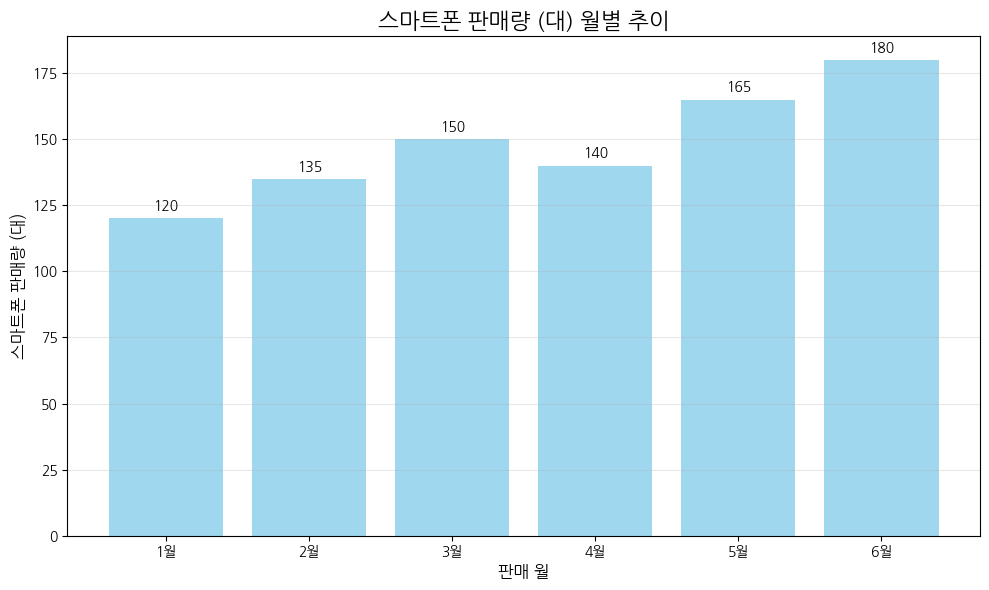

✅ 막대 그래프 완성!
📊 x축: 판매 월, y축: 스마트폰 판매량 (대)


In [28]:
print("🔍 8-2. 막대 그래프 - 한글 컬럼명 활용")
print("=" * 40)

# get_head_att()로 한글 컬럼명 가져오기
att_dict = sales_df.get_head_att()

# 월별 스마트폰 판매량 막대 그래프
plt.figure(figsize=(10, 6))
plt.bar(sales_df['month'], sales_df['smartphone'], color='skyblue', alpha=0.8)

# 한글 제목과 레이블 설정
plt.title(f'{att_dict["smartphone"]} 월별 추이', fontsize=16, fontweight='bold')
plt.xlabel(att_dict['month'], fontsize=12)
plt.ylabel(att_dict['smartphone'], fontsize=12)

# 그래프 꾸미기
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(sales_df['smartphone']):
    plt.text(i, v + 2, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"✅ 막대 그래프 완성!")
print(f"📊 x축: {att_dict['month']}, y축: {att_dict['smartphone']}")

🔍 8-3. 다중 선 그래프 - 여러 제품 비교


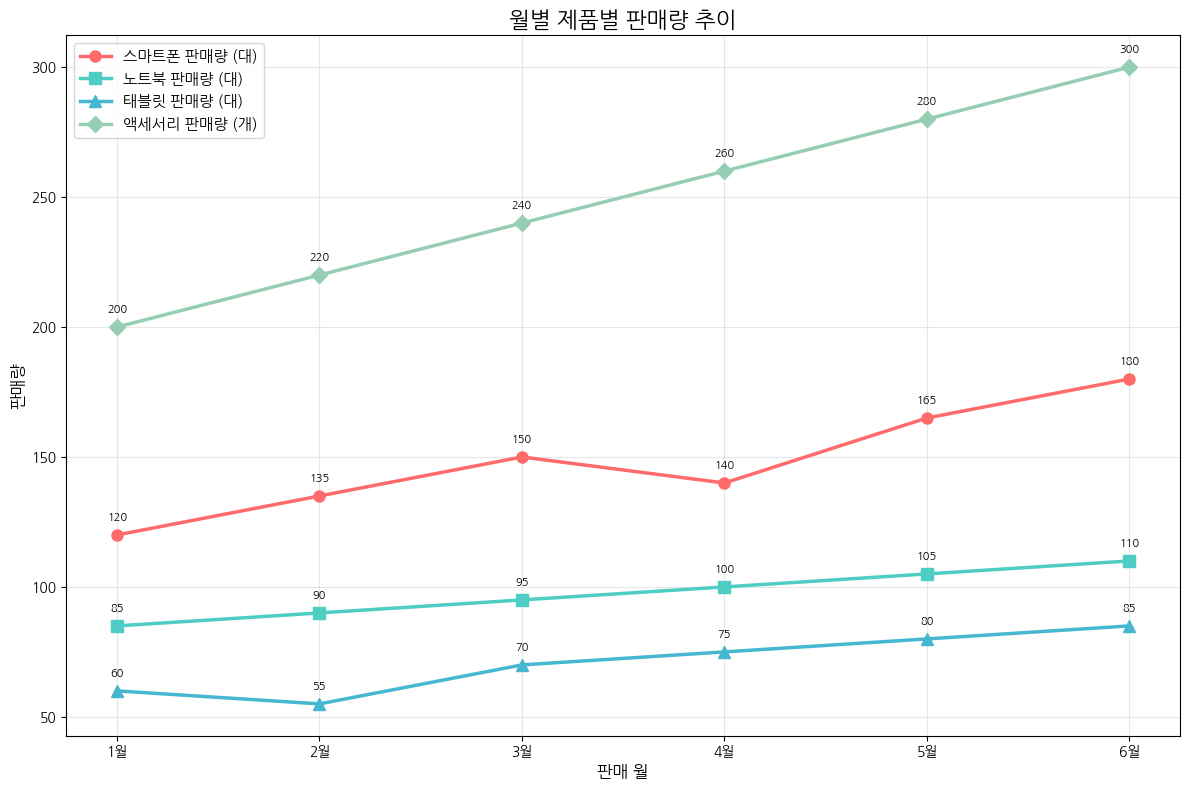

✅ 다중 선 그래프 완성!
📊 범례: ['스마트폰 판매량 (대)', '노트북 판매량 (대)', '태블릿 판매량 (대)', '액세서리 판매량 (개)']


In [29]:
print("🔍 8-3. 다중 선 그래프 - 여러 제품 비교")
print("=" * 40)

# 다중 선 그래프로 모든 제품 판매량 비교
plt.figure(figsize=(12, 8))

# 각 제품별 선 그래프
products = ['smartphone', 'laptop', 'tablet', 'accessories']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
markers = ['o', 's', '^', 'D']

for i, product in enumerate(products):
    plt.plot(sales_df['month'], sales_df[product], 
             color=colors[i], marker=markers[i], linewidth=2.5, 
             markersize=8, label=att_dict[product])

# 한글 제목과 레이블 설정
plt.title('월별 제품별 판매량 추이', fontsize=16, fontweight='bold')
plt.xlabel(att_dict['month'], fontsize=12)
plt.ylabel('판매량', fontsize=12)

# 범례와 그리드 설정
plt.legend(fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)

# 각 점에 값 표시
for product in products:
    for i, v in enumerate(sales_df[product]):
        plt.annotate(str(v), (i, v), textcoords="offset points", 
                    xytext=(0,10), ha='center', fontsize=8)

plt.tight_layout()
plt.show()

print(f"✅ 다중 선 그래프 완성!")
print(f"📊 범례: {[att_dict[p] for p in products]}")

🔍 8-4. 파이 차트 - 6월 제품별 판매 비율


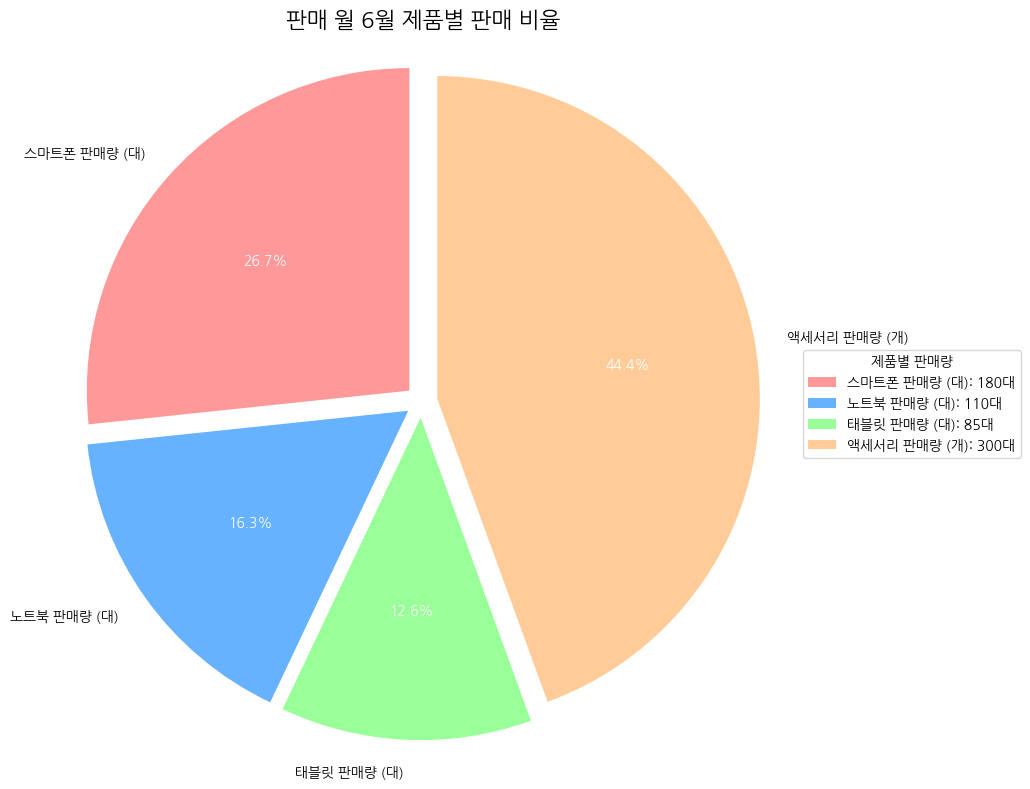

✅ 파이 차트 완성!
📊 총 판매량: 675개
📊 데이터: {'스마트폰 판매량 (대)': 180, '노트북 판매량 (대)': 110, '태블릿 판매량 (대)': 85, '액세서리 판매량 (개)': 300}


In [30]:
print("🔍 8-4. 파이 차트 - 6월 제품별 판매 비율")
print("=" * 40)

# 6월 데이터로 파이 차트 생성
june_data = sales_df.iloc[-1]  # 마지막 행 (6월 데이터)
june_sales = [june_data[product] for product in products]
june_labels = [att_dict[product] for product in products]

# 파이 차트 생성
plt.figure(figsize=(10, 8))
colors_pie = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

wedges, texts, autotexts = plt.pie(june_sales, labels=june_labels, colors=colors_pie,
                                  autopct='%1.1f%%', startangle=90, 
                                  explode=(0.05, 0.05, 0.05, 0.05))

# 텍스트 스타일 설정
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

plt.title(f'{att_dict["month"]} 6월 제품별 판매 비율', fontsize=16, fontweight='bold')

# 범례 설정 (판매량 포함)
legend_labels = [f'{label}: {sales}대' for label, sales in zip(june_labels, june_sales)]
plt.legend(wedges, legend_labels, title="제품별 판매량", loc="center left", 
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')
plt.tight_layout()
plt.show()

print(f"✅ 파이 차트 완성!")
print(f"📊 총 판매량: {sum(june_sales):,}개")
print(f"📊 데이터: {dict(zip(june_labels, june_sales))}")

🔍 8-5. 히트맵 - 월별/제품별 판매량 매트릭스


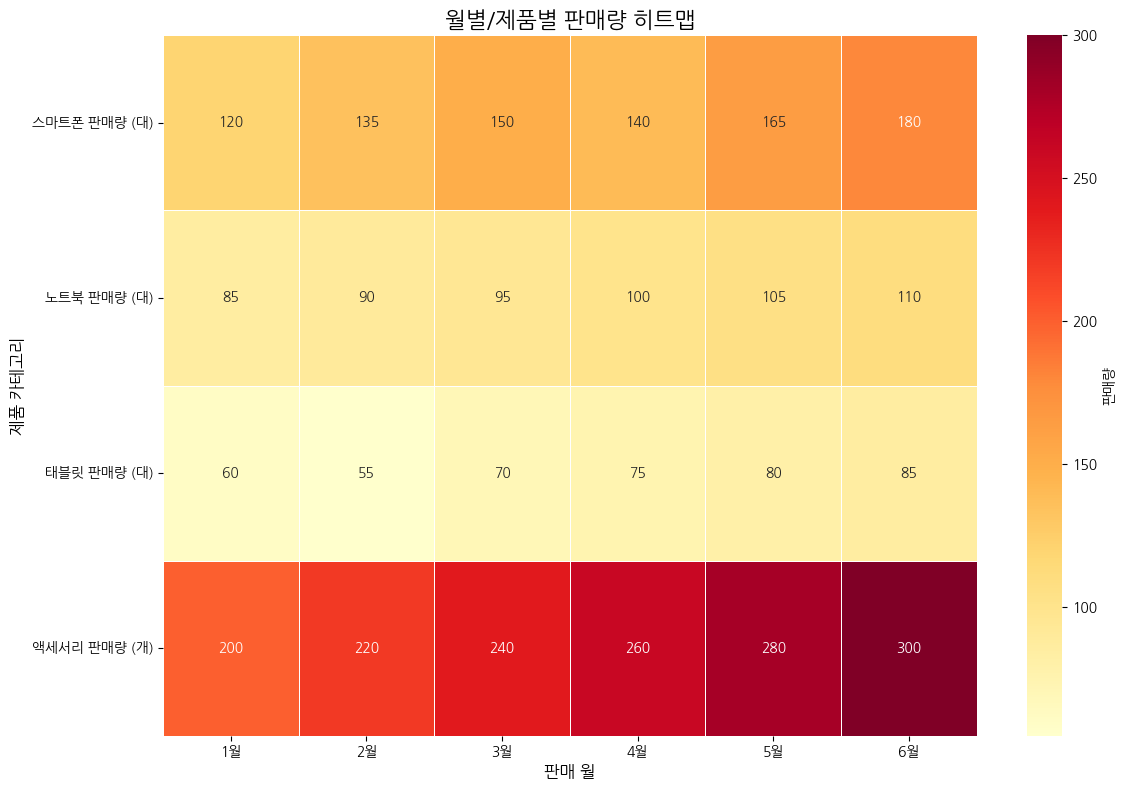

✅ 히트맵 완성!
📊 매트릭스 크기: (4, 6)
📊 최대 판매량: 300개 (('6월', '액세서리 판매량 (개)'))
📊 최소 판매량: 55개 (('2월', '태블릿 판매량 (대)'))


In [31]:
print("🔍 8-5. 히트맵 - 월별/제품별 판매량 매트릭스")
print("=" * 40)

# 히트맵용 데이터 준비 (월을 인덱스로, 제품을 컬럼으로)
heatmap_data = sales_df.set_index('month')[products]

# 컬럼명을 한글로 변경
heatmap_data.columns = [att_dict[col] for col in products]
heatmap_data.index.name = att_dict['month']

# 히트맵 생성
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data.T, annot=True, cmap='YlOrRd', fmt='d', 
           cbar_kws={'label': '판매량'}, linewidths=0.5)

plt.title('월별/제품별 판매량 히트맵', fontsize=16, fontweight='bold')
plt.xlabel(att_dict['month'], fontsize=12)
plt.ylabel('제품 카테고리', fontsize=12)

# 축 레이블 회전
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

print(f"✅ 히트맵 완성!")
print(f"📊 매트릭스 크기: {heatmap_data.T.shape}")
print(f"📊 최대 판매량: {heatmap_data.values.max()}개 ({heatmap_data.stack().idxmax()})")
print(f"📊 최소 판매량: {heatmap_data.values.min()}개 ({heatmap_data.stack().idxmin()})")

🔍 8-6. 종합 대시보드 - 서브플롯으로 한 번에 보기


C:\Users\sw1\AppData\Local\Temp\ipykernel_100380\3333018685.py:49: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
c:\Users\sw1\anaconda3\envs\py310env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


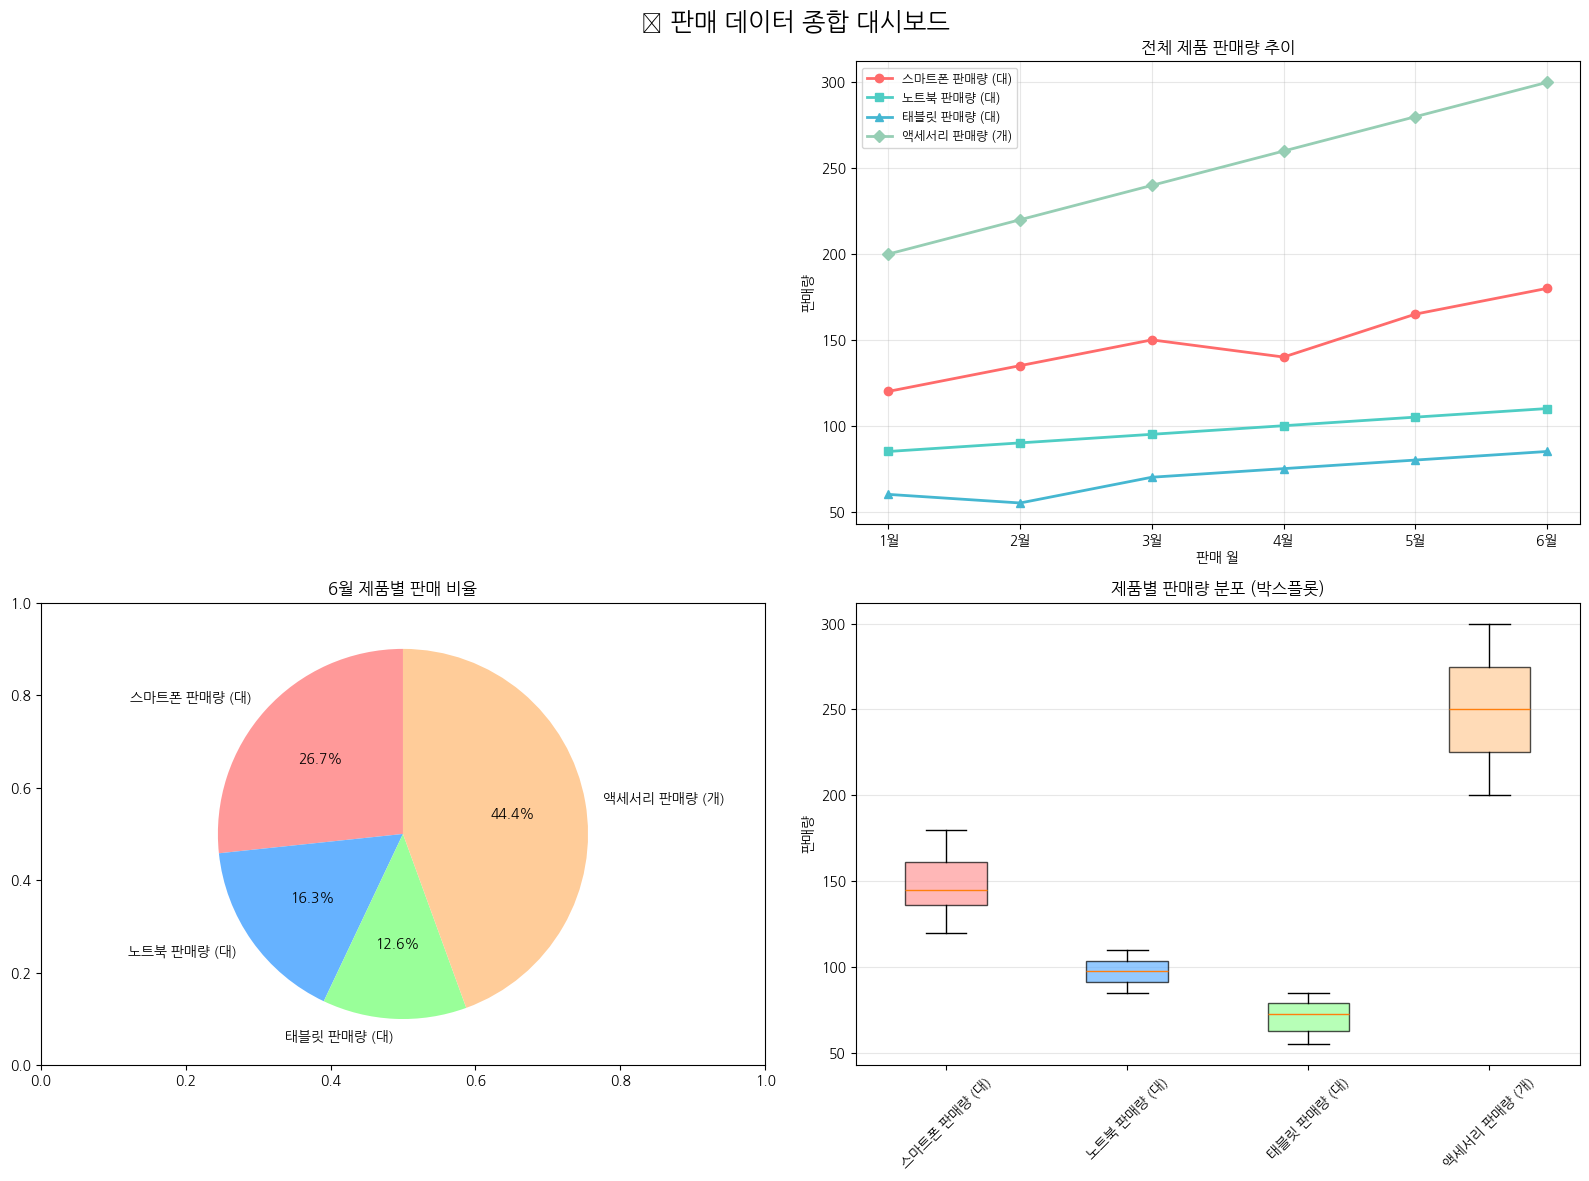

✅ 종합 대시보드 완성!
📊 4가지 그래프 타입으로 다각도 분석:
   • 막대: 스마트폰 판매량 (대) 월별 추이
   • 선형: 전체 제품 판매량 비교
   • 파이: 6월 제품별 비율
   • 박스: 제품별 판매량 분포


In [32]:
print("🔍 8-6. 종합 대시보드 - 서브플롯으로 한 번에 보기")
print("=" * 40)

# 2x2 서브플롯 구성
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📊 판매 데이터 종합 대시보드', fontsize=18, fontweight='bold')

# 1. 막대 그래프 (좌상단)
axes[0, 0].bar(sales_df['month'], sales_df['smartphone'], color='skyblue', alpha=0.8)
axes[0, 0].set_title(f'{att_dict["smartphone"]} 월별 추이', fontweight='bold')
axes[0, 0].set_xlabel(att_dict['month'])
axes[0, 0].set_ylabel(att_dict['smartphone'])
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. 선 그래프 (우상단)
for i, product in enumerate(products):
    axes[0, 1].plot(sales_df['month'], sales_df[product], 
                   color=colors[i], marker=markers[i], linewidth=2, 
                   label=att_dict[product])
axes[0, 1].set_title('전체 제품 판매량 추이', fontweight='bold')
axes[0, 1].set_xlabel(att_dict['month'])
axes[0, 1].set_ylabel('판매량')
axes[0, 1].legend(fontsize=9)
axes[0, 1].grid(True, alpha=0.3)

# 3. 파이 차트 (좌하단)
axes[0, 0].remove()  # 기존 축 제거
ax_pie = fig.add_subplot(2, 2, 3)
wedges, texts, autotexts = ax_pie.pie(june_sales, labels=june_labels, 
                                     colors=colors_pie, autopct='%1.1f%%', 
                                     startangle=90)
ax_pie.set_title('6월 제품별 판매 비율', fontweight='bold')

# 4. 박스플롯 (우하단) - 제품별 판매량 분포
box_data = [sales_df[product].values for product in products]
box_labels = [att_dict[product] for product in products]
bp = axes[1, 1].boxplot(box_data, labels=box_labels, patch_artist=True)

# 박스플롯 색상 설정
for patch, color in zip(bp['boxes'], colors_pie):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

axes[1, 1].set_title('제품별 판매량 분포 (박스플롯)', fontweight='bold')
axes[1, 1].set_ylabel('판매량')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ 종합 대시보드 완성!")
print("📊 4가지 그래프 타입으로 다각도 분석:")
print(f"   • 막대: {att_dict['smartphone']} 월별 추이")
print(f"   • 선형: 전체 제품 판매량 비교")
print(f"   • 파이: 6월 제품별 비율")
print(f"   • 박스: 제품별 판매량 분포")

### 📈 그래프 시각화 테스트 요약

#### ✅ 완성된 그래프 목록
1. **막대 그래프**: 월별 스마트폰 판매량 - `get_head_att()`로 한글 제목/레이블 설정
2. **다중 선 그래프**: 전체 제품 판매량 추이 - 범례에 한글 설명 활용
3. **파이 차트**: 6월 제품별 판매 비율 - 한글 레이블과 범례 구성
4. **히트맵**: 월별/제품별 매트릭스 - seaborn과 한글 축 레이블 조합
5. **종합 대시보드**: 2x2 서브플롯으로 다양한 차트 통합

#### 🎯 핵심 포인트
- **`get_head_att()` 활용**: 영문 컬럼명을 한글 설명으로 자동 변환
- **한글 폰트 지원**: helper 모듈의 폰트 설정으로 한글 깨짐 방지
- **다양한 차트 타입**: matplotlib, seaborn 라이브러리와 완벽 호환
- **동적 레이블링**: 컬럼 설명 변경 시 그래프 제목도 자동 업데이트

#### 💡 사용 패턴
```python
# 1. 데이터프레임에 한글 설명 설정
df.set_head_att({'col1': '한글설명1', 'col2': '한글설명2'})

# 2. 그래프에서 한글 제목/레이블 활용
att_dict = df.get_head_att()
plt.title(att_dict['col1'])
plt.xlabel(att_dict['col2'])
```

이제 영문 컬럼명 데이터도 한글 그래프로 쉽게 시각화할 수 있습니다! 🎉

## Section 9: head_ext와 head_att 연동 테스트

`set_head_column()` 이후 `get_head_att()`가 변경된 컬럼명과 제대로 연동되는지 테스트합니다.

In [33]:
# helper 모듈 import 및 설정
import importlib.util
import sys

# helper.c0z0c.dev.py 모듈 로드
spec = importlib.util.spec_from_file_location("helper", "helper.c0z0c.dev.py")
helper = importlib.util.module_from_spec(spec)
sys.modules["helper"] = helper
spec.loader.exec_module(helper)

# helper 설정 실행
helper.setup()

🚀 Jupyter/Colab 한글 환경 설정을 시작합니다...
✔️ Font already exists.
font_path=fonts\NanumGothic.ttf


**💻 실행 환경**: 로컬
✅ 한글 폰트가 성공적으로 설정되었습니다.

✅ pandas 확장 기능이 성공적으로 설정되었습니다.
🎉 모든 설정이 완료되었습니다!
✅ 사용 가능한 기능:
   - 한글 폰트 지원
   - helper.pd_read_csv(): 파일 읽기
   - DataFrame.head_att(): 한글 컬럼 설명


In [34]:
# 1. 테스트용 DataFrame 생성
import pandas as pd
import numpy as np

# 테스트용 데이터 생성
test_df = pd.DataFrame({
    'customer_id': ['C001', 'C002', 'C003', 'C004', 'C005'],
    'name': ['김철수', '이영희', '박민수', '최지은', '정상훈'],
    'age': [25, 32, 28, 35, 29],
    'city': ['서울', '부산', '대구', '인천', '광주'],
    'score': [85, 92, 78, 96, 83]
})

print("🔧 테스트용 DataFrame 생성")
print(f"📊 데이터 크기: {test_df.shape}")
print(f"📋 컬럼명: {list(test_df.columns)}")
test_df.head()

🔧 테스트용 DataFrame 생성
📊 데이터 크기: (5, 5)
📋 컬럼명: ['customer_id', 'name', 'age', 'city', 'score']


,customer_id,name,age,city,score
0,C001,김철수,25,서울,85
1,C002,이영희,32,부산,92
2,C003,박민수,28,대구,78
3,C004,최지은,35,인천,96
4,C005,정상훈,29,광주,83


In [35]:
# 2. 초기 head_att 설정 (원본 영문 컬럼명 기준)
initial_att = {
    'customer_id': '고객ID',
    'name': '고객명',  
    'age': '나이',
    'city': '도시',
    'score': '점수'
}

test_df.set_head_att(initial_att)
print("✅ 초기 head_att 설정 완료")
print("\n📋 현재 head_att 상태:")
print(test_df.get_head_att())

print("\n🔍 개별 컬럼 조회 테스트:")
for col in ['customer_id', 'name', 'score']:
    try:
        desc = test_df.get_head_att(col)
        print(f"  {col} → {desc}")
    except KeyError as e:
        print(f"  ❌ {col}: {e}")

✅ 초기 head_att 설정 완료

📋 현재 head_att 상태:
{'customer_id': '고객ID', 'name': '고객명', 'age': '나이', 'city': '도시', 'score': '점수'}

🔍 개별 컬럼 조회 테스트:
  customer_id → 고객ID
  name → 고객명
  score → 점수


In [36]:
# 3. head_ext 한글 컬럼 세트 설정
korean_columns = {
    'customer_id': '고객아이디',
    'name': '이름', 
    'age': '연령',
    'city': '거주지',
    'score': '평점'
}

test_df.set_head_ext('korean', korean_columns)
print("✅ 한글 컬럼 세트 설정 완료")

print("\n📋 등록된 컬럼 세트 목록:")
test_df.list_head_ext()

print(f"\n🔍 현재 활성 컬럼 세트: {test_df.get_current_column_set()}")
print(f"📋 현재 컬럼명: {list(test_df.columns)}")

✅ 컬럼 세트 'korean' 설정 완료
📊 5개 컬럼 매핑됨
✅ 한글 컬럼 세트 설정 완료

📋 등록된 컬럼 세트 목록:
📋 등록된 컬럼 세트:
   org (현재): ['customer_id', 'name', 'age', 'city', 'score']
     korean: ['고객아이디', '이름', '연령', '거주지', '평점']

🔍 현재 활성 컬럼 세트: org
📋 현재 컬럼명: ['customer_id', 'name', 'age', 'city', 'score']


In [37]:
# 4. 한글 컬럼으로 변경 후 get_head_att 연동 테스트
print("🔄 한글 컬럼명으로 변경 중...")
test_df.set_head_column('korean')

print(f"\n✅ 컬럼명 변경 완료")
print(f"🔍 현재 활성 컬럼 세트: {test_df.get_current_column_set()}")
print(f"📋 현재 컬럼명: {list(test_df.columns)}")

print(f"\n📋 현재 head_att 상태:")
current_att = test_df.get_head_att()
print(current_att)

print(f"\n🧪 연동 테스트: 변경된 컬럼명으로 get_head_att 개별 조회")
for new_col in ['고객아이디', '이름', '평점']:
    try:
        desc = test_df.get_head_att(new_col)
        print(f"  ✅ '{new_col}' → '{desc}'")
    except KeyError as e:
        print(f"  ❌ '{new_col}': {e}")

print(f"\n🧪 역방향 테스트: 기존 영문 컬럼명으로 조회 시도")
for old_col in ['customer_id', 'name', 'score']:
    try:
        desc = test_df.get_head_att(old_col)
        print(f"  ⚠️  '{old_col}' → '{desc}' (예상: 오류)")
    except KeyError as e:
        print(f"  ✅ '{old_col}': 정상적으로 오류 발생 - {type(e).__name__}")

🔄 한글 컬럼명으로 변경 중...
✅ 컬럼명 변경: 'org' → 'korean'
📋 현재 컬럼: ['고객아이디', '이름', '연령', '거주지', '평점']

✅ 컬럼명 변경 완료
🔍 현재 활성 컬럼 세트: korean
📋 현재 컬럼명: ['고객아이디', '이름', '연령', '거주지', '평점']

📋 현재 head_att 상태:
{'고객아이디': '고객ID', '이름': '고객명', '연령': '나이', '거주지': '도시', '평점': '점수'}

🧪 연동 테스트: 변경된 컬럼명으로 get_head_att 개별 조회
  ✅ '고객아이디' → '고객ID'
  ✅ '이름' → '고객명'
  ✅ '평점' → '점수'

🧪 역방향 테스트: 기존 영문 컬럼명으로 조회 시도
  ✅ 'customer_id': 정상적으로 오류 발생 - KeyError
  ✅ 'name': 정상적으로 오류 발생 - KeyError
  ✅ 'score': 정상적으로 오류 발생 - KeyError


In [38]:
# 5. head_att 출력 기능과 연동 테스트
print("📊 head_att() 출력 테스트 (한글 컬럼명 상태)")
print("=" * 50)
test_df.head_att()

print("\n🌐 HTML 출력 테스트")
print("=" * 50)
html_result = test_df.head_att(out='html')
print("✅ HTML 출력 성공 (위에 표시됨)")

print(f"\n📄 문자열 출력 테스트")
print("=" * 50)
str_result = test_df.head_att(out='str')
print("문자열 결과:")
print(str_result)

📊 head_att() 출력 테스트 (한글 컬럼명 상태)
       고객ID 고객명 나이   도시 점수
   고객아이디   이름 연령 거주지 평점
 0       C001 김철수   25   서울   85
 1       C002 이영희   32   부산   92
 2       C003 박민수   28   대구   78
 3       C004 최지은   35   인천   96
 4       C005 정상훈   29   광주   83

🌐 HTML 출력 테스트
✅ HTML 출력 성공 (위에 표시됨)

📄 문자열 출력 테스트
문자열 결과:
고객ID고객명     나이   도시 점수   
고객아이디이름       연령   거주지평점   
0C001김철수     25     서울 85     
1C002이영희     32     부산 92     
2C003박민수     28     대구 78     
3C004최지은     35     인천 96     
4C005정상훈     29     광주 83


In [39]:
# 6. 원본 컬럼으로 복원 후 연동 테스트
print("🔄 원본 컬럼명으로 복원 중...")
test_df.set_head_column('org')

print(f"\n✅ 원본 복원 완료")
print(f"🔍 현재 활성 컬럼 세트: {test_df.get_current_column_set()}")
print(f"📋 현재 컬럼명: {list(test_df.columns)}")

print(f"\n📋 복원 후 head_att 상태:")
restored_att = test_df.get_head_att()
print(restored_att)

print(f"\n🧪 복원 후 개별 조회 테스트 (영문 컬럼명)")
for col in ['customer_id', 'name', 'score']:
    try:
        desc = test_df.get_head_att(col)
        print(f"  ✅ '{col}' → '{desc}'")
    except KeyError as e:
        print(f"  ❌ '{col}': {e}")

print(f"\n🧪 한글 컬럼명으로 조회 시도 (예상: 오류)")
for korean_col in ['고객아이디', '이름', '평점']:
    try:
        desc = test_df.get_head_att(korean_col)
        print(f"  ⚠️  '{korean_col}' → '{desc}' (예상: 오류)")
    except KeyError as e:
        print(f"  ✅ '{korean_col}': 정상적으로 오류 발생 - {type(e).__name__}")

🔄 원본 컬럼명으로 복원 중...
✅ 컬럼명 변경: 'korean' → 'org'
📋 현재 컬럼: ['customer_id', 'name', 'age', 'city', 'score']

✅ 원본 복원 완료
🔍 현재 활성 컬럼 세트: org
📋 현재 컬럼명: ['customer_id', 'name', 'age', 'city', 'score']

📋 복원 후 head_att 상태:
{'customer_id': '고객ID', 'name': '고객명', 'age': '나이', 'city': '도시', 'score': '점수'}

🧪 복원 후 개별 조회 테스트 (영문 컬럼명)
  ✅ 'customer_id' → '고객ID'
  ✅ 'name' → '고객명'
  ✅ 'score' → '점수'

🧪 한글 컬럼명으로 조회 시도 (예상: 오류)
  ✅ '고객아이디': 정상적으로 오류 발생 - KeyError
  ✅ '이름': 정상적으로 오류 발생 - KeyError
  ✅ '평점': 정상적으로 오류 발생 - KeyError


In [42]:
# 7. 다중 컬럼 세트 테스트
print("🔧 추가 컬럼 세트 생성 중...")

# 약어 버전 컬럼 세트 추가
abbrev_columns = {
    'customer_id': 'ID',
    'name': '성명',
    'age': '연령',
    'city': '지역', 
    'score': '점수'
}

test_df.set_head_ext('abbrev', abbrev_columns)

# 설명 버전 컬럼 세트 추가  
desc_columns = {
    'customer_id': '고객식별번호',
    'name': '고객성명',
    'age': '고객연령',
    'city': '거주도시',
    'score': '평가점수'
}

test_df.set_head_ext('description', desc_columns)

print("✅ 추가 컬럼 세트 생성 완료")
print("\n📋 전체 컬럼 세트 목록:")
test_df.list_head_ext()

# 각 세트별 연동 테스트
test_sets = ['korean', 'abbrev', 'description', 'org']

for set_name in test_sets:
    print(f"\n🧪 '{set_name}' 세트 연동 테스트")
    print("=" * 40)
    
    test_df.set_head_column(set_name)
    print(f"현재 컬럼: {list(test_df.columns)}")
    
    # 첫 번째와 마지막 컬럼에 대해 get_head_att 테스트
    first_col = test_df.columns[0]
    last_col = test_df.columns[-1]
    
    for test_col in [first_col, last_col]:
        try:
            desc = test_df.get_head_att(test_col)
            print(f"  ✅ '{test_col}' → '{desc}'")
        except KeyError as e:
            print(f"  ❌ '{test_col}': {e}")

🔧 추가 컬럼 세트 생성 중...
✅ 컬럼 세트 'abbrev' 설정 완료
📊 5개 컬럼 매핑됨
✅ 컬럼 세트 'description' 설정 완료
📊 5개 컬럼 매핑됨
✅ 추가 컬럼 세트 생성 완료

📋 전체 컬럼 세트 목록:
📋 등록된 컬럼 세트:
        org (현재): ['customer_id', 'name', 'age', 'city', 'score']
          korean: ['고객아이디', '이름', '연령', '거주지', '평점']
          abbrev: ['ID', '성명', '연령', '지역', '점수']
     description: ['고객식별번호', '고객성명', '고객연령', '거주도시', '평가점수']

🧪 'korean' 세트 연동 테스트
✅ 컬럼명 변경: 'org' → 'korean'
📋 현재 컬럼: ['고객아이디', '이름', '연령', '거주지', '평점']
현재 컬럼: ['고객아이디', '이름', '연령', '거주지', '평점']
  ✅ '고객아이디' → '고객ID'
  ✅ '평점' → '점수'

🧪 'abbrev' 세트 연동 테스트
✅ 컬럼명 변경: 'korean' → 'abbrev'
📋 현재 컬럼: ['ID', '성명', '연령', '지역', '점수']
현재 컬럼: ['ID', '성명', '연령', '지역', '점수']
  ✅ 'ID' → '고객ID'
  ✅ '점수' → '점수'

🧪 'description' 세트 연동 테스트
✅ 컬럼명 변경: 'abbrev' → 'description'
📋 현재 컬럼: ['고객식별번호', '고객성명', '고객연령', '거주도시', '평가점수']
현재 컬럼: ['고객식별번호', '고객성명', '고객연령', '거주도시', '평가점수']
  ✅ '고객식별번호' → '고객ID'
  ✅ '평가점수' → '점수'

🧪 'org' 세트 연동 테스트
✅ 컬럼명 변경: 'description' → 'org'
📋 현재 컬럼: ['customer_id', 'name', 'age', 

In [43]:
# 8. 연동 테스트 종합 결과 요약
print("📊 head_ext와 head_att 연동 테스트 결과 요약")
print("=" * 60)

print("✅ 성공적으로 검증된 기능들:")
print("1. set_head_column() 이후 get_head_att()가 변경된 컬럼명으로 정상 작동")
print("2. 컬럼명 변경 시 head_att 설명이 자동으로 업데이트됨")
print("3. 이전 컬럼명으로 조회 시 적절한 KeyError 발생")
print("4. 다양한 컬럼 세트 간 전환 시 연동 정상 작동")
print("5. head_att() 출력 기능과 연동 정상 작동")

print("\n🔍 검증된 연동 메커니즘:")
print("- _update_column_descriptions() 함수가 컬럼명 변경 시 자동 호출")
print("- 원본 컬럼 기준으로 설명 매핑이 유지됨")
print("- 각 컬럼 세트별로 독립적인 설명 관리")

print("\n💡 실제 사용 시나리오:")
print("- 데이터 분석 시 영문 → 한글 컬럼명 전환")
print("- 보고서 작성 시 약어 → 상세 설명 전환")
print("- 다국어 지원을 위한 컬럼명 세트 관리")

# 최종 상태 확인
print(f"\n📋 최종 상태:")
print(f"활성 컬럼 세트: {test_df.get_current_column_set()}")
print(f"현재 컬럼명: {list(test_df.columns)}")
print(f"head_att 설정: {len(test_df.get_head_att())}개 컬럼")

# 간단한 최종 출력 테스트
print(f"\n📊 최종 연동 확인:")
test_df.head_att(3)

📊 head_ext와 head_att 연동 테스트 결과 요약
✅ 성공적으로 검증된 기능들:
1. set_head_column() 이후 get_head_att()가 변경된 컬럼명으로 정상 작동
2. 컬럼명 변경 시 head_att 설명이 자동으로 업데이트됨
3. 이전 컬럼명으로 조회 시 적절한 KeyError 발생
4. 다양한 컬럼 세트 간 전환 시 연동 정상 작동
5. head_att() 출력 기능과 연동 정상 작동

🔍 검증된 연동 메커니즘:
- _update_column_descriptions() 함수가 컬럼명 변경 시 자동 호출
- 원본 컬럼 기준으로 설명 매핑이 유지됨
- 각 컬럼 세트별로 독립적인 설명 관리

💡 실제 사용 시나리오:
- 데이터 분석 시 영문 → 한글 컬럼명 전환
- 보고서 작성 시 약어 → 상세 설명 전환
- 다국어 지원을 위한 컬럼명 세트 관리

📋 최종 상태:
활성 컬럼 세트: org
현재 컬럼명: ['customer_id', 'name', 'age', 'city', 'score']
head_att 설정: 5개 컬럼

📊 최종 연동 확인:
        고객ID 고객명 나이 도시  점수
   customer_id   name  age city score
 0        C001 김철수   25 서울    85
 1        C002 이영희   32 부산    92
 2        C003 박민수   28 대구    78
